In [1]:
import pandas as pd
import os
import glob
import numpy as np
import itertools as IT
import csv
import csv as cv 
import matplotlib.pyplot as plt
import tkinter
import tkinter.filedialog
from numpy import genfromtxt
from pathlib import Path
import torch
import torchvision
from pylab import *

In [4]:
pwd

'C:\\Users\\makn0023\\Desktop\\Thesis\\Data\\LOD_0_0'

In [8]:
path = 'C:\\Users\\makn0023\\Desktop\\Thesis\\Data\\LOD_0_0'
os.chdir(path)
len(os.listdir(path))

96

In [7]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [10]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\Data\\LOD_0_0")

data = {}
for i in range(0,96):
    try:
        f = p / f"LOD_0_0_{i}.csv"
        data[i]=pd.read_csv(f)
    except IOError:
       pass

df = pd.concat(data)
avg=df.groupby(level=1).mean()
std=df.groupby(level=1).std()
# /np.sqrt(len(df))
print(df)
print(avg)
print(std)

       Generation      ID      Score
0  0          100   10143  100.00000
   1          200   20107  100.00000
   2          300   30100  100.00000
   3          400   40126  100.00000
   4          500   50177   99.99709
...           ...     ...        ...
95 94        9500  950131  100.00000
   95        9600  960132  100.00000
   96        9700  970100  100.00000
   97        9700  970100  100.00000
   98        9700  970100  100.00000

[9108 rows x 3 columns]
     Generation             ID      Score
0    100.000000   10126.086957  99.948307
1    200.000000   20133.967391  99.951123
2    300.000000   30137.836957  99.704319
3    400.000000   40134.489130  99.945491
4    500.000000   50132.836957  99.991116
..          ...            ...        ...
94  9477.173913  947859.619565  99.994681
95  9569.565217  957089.184783  99.999985
96  9646.739130  964811.423913  99.726826
97  9682.608696  968393.010870  99.998124
98  9682.608696  968393.010870  99.998124

[99 rows x 3 columns]
    

In [11]:
std['Score']

0     0.495181
1     0.382404
2     2.590994
3     0.342604
4     0.071409
        ...   
94    0.046878
95    0.000142
96    2.606290
97    0.014337
98    0.014337
Name: Score, Length: 99, dtype: float64

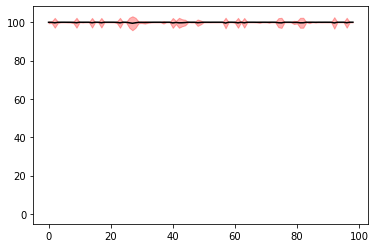

In [12]:
# imshow(df)
figure()
plot(avg['Score'],'k')
plot(std['Score'],'w')
fill_between(range(99),avg['Score']+std['Score'], avg['Score']-std['Score'], alpha=0.3, color='r')

In [4]:
pwd

'C:\\Users\\makn0023\\Desktop\\Thesis\\Data\\LOD_0_0'

In [105]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\Data\\LOD_0_0")

data = {}
for i in range(0,5):
    f = p / f"LOD_0_0_{i}.csv"
    data[i]=pd.read_csv(f)

df1 = pd.concat(data)

In [117]:
p = Path(r"C:\\Users\\makn0023\\Desktop\\Thesis\\Data\\LOD_0_0")

data = {}
for i in range(0,5):
    f = p / f"LOD_0_0_{i}.csv"
    data=np.loadtxt(f)

# df1 = pd.concat(data)

ValueError: could not convert string to float: 'Generation,ID,Score'

In [114]:
data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [101]:
%timeit df1.to_records()
a=np.rec.fromrecords(df1, names=df1.columns.tolist())

431 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [104]:
a.recarray

AttributeError: recarray has no attribute recarray

In [89]:
a.as_matrix()

AttributeError: 'generator' object has no attribute 'as_matrix'

In [55]:
array.dtype

dtype('O')

In [50]:
torch.from_numpy(array)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [62]:
array.mean(0)

AxisError: axis 0 is out of bounds for array of dimension 0

In [70]:
array = np.asarray(array)

In [69]:
array = np.array(list(data.items()))

array

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([[0,
            Generation      ID       Score
0          100   10143  100.000000
1          200   20107  100.000000
2          300   30100  100.000000
3          400   40126  100.000000
4          500   50177   99.997090
..         ...     ...         ...
94        9500  950111   99.998439
95        9600  960175  100.000000
96        9700  970108  100.000000
97        9700  970108  100.000000
98        9700  970108  100.000000

[99 rows x 3 columns]],
       [1,
            Generation      ID       Score
0          100   10170  100.000000
1          200   20100  100.000000
2          300   30198  100.000000
3          400   40153  100.000000
4          500   50103  100.000000
..         ...     ...         ...
94        9500  950148   99.986691
95        9600  960137  100.000000
96        9700  970129  100.000000
97        9700  970129  100.000000
98        9700  970129  100.000000

[99 rows x 3 columns]],
       [2,
            Generation      ID       Score
0          100   1

In [73]:
array.mean(0)

array([2.0,
           Generation        ID       Score
0        100.0   10131.6  100.000000
1        200.0   20121.8   99.999999
2        300.0   30148.4  100.000000
3        400.0   40118.0  100.000000
4        500.0   50116.6   99.999418
..         ...       ...         ...
94      9500.0  950153.4   99.997026
95      9600.0  960128.2  100.000000
96      9700.0  970136.8  100.000000
97      9740.0  974140.8  100.000000
98      9740.0  974140.8  100.000000

[99 rows x 3 columns]], dtype=object)

In [74]:
array.std(0)/sqrt(100)

TypeError: loop of ufunc does not support argument 1 of type DataFrame which has no callable conjugate method

In [36]:
def exp_test(x):
  x.int()
  return np.exp(x)

In [38]:
array = np.array(array)

In [40]:
array.mean(0)

array([2.0,
           Generation        ID       Score
0        100.0   10131.6  100.000000
1        200.0   20121.8   99.999999
2        300.0   30148.4  100.000000
3        400.0   40118.0  100.000000
4        500.0   50116.6   99.999418
..         ...       ...         ...
94      9500.0  950153.4   99.997026
95      9600.0  960128.2  100.000000
96      9700.0  970136.8  100.000000
97      9740.0  974140.8  100.000000
98      9740.0  974140.8  100.000000

[99 rows x 3 columns]], dtype=object)

In [41]:
array.std(0)

AttributeError: 'numpy.ndarray' object has no attribute 'Std'

In [31]:
dataset1 = array.astype(np.float)

ValueError: setting an array element with a sequence.

In [6]:
df1

Generation      ID      Score
0 0          100   10143  100.00000
  1          200   20107  100.00000
  2          300   30100  100.00000
  3          400   40126  100.00000
  4          500   50177   99.99709
...          ...     ...        ...
4 94        9500  950184  100.00000
  95        9600  960105  100.00000
  96        9700  970177  100.00000
  97        9800  980100  100.00000
  98        9800  980100  100.00000

[495 rows x 3 columns]

In [5]:
df = pd.read_csv("LOD_0_0_1.csv")

In [6]:
df

,generation,ID,score
0,0,100,99.998300
1,100,10170,100.000000
2,200,20100,100.000000
3,300,30198,100.000000
4,400,40153,100.000000
5,500,50103,100.000000
6,600,60135,100.000000
7,700,70153,100.000000
8,800,80144,100.000000
9,900,90118,100.000000


In [7]:
for i in range(len(df.iloc[0:100])):
    df = df.append(df[-1:])

In [8]:
df.reset_index()

,index,generation,ID,score
0,0,0,100,99.9983
1,1,100,10170,100.0000
2,2,200,20100,100.0000
3,3,300,30198,100.0000
4,4,400,40153,100.0000
...,...,...,...,...
97,50,4500,450100,100.0000
98,50,4500,450100,100.0000
99,50,4500,450100,100.0000
100,50,4500,450100,100.0000


In [110]:
if df.iloc[0]['generation'] >= 5000:
    pass
        

In [111]:
if df.iloc[0]['generation'] == 0 and df.iloc[0]['generation'] == 1000:
    pass

In [112]:
if df.iloc[0]['generation'] >= 4500:
    for i in df.iloc[50:100] == " ":
        df = df.append(df[-1:])

In [104]:
n = 100
if df.iloc[0]['generation'] >= 4500:
    for i in range(n):
        df = df.append(df[-1:])

In [108]:
for i in df.iloc[50:] == " ":
        df = df.append(df[-1:])

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [21]:
for i in df.iloc[50:100] == " ":
        df = df.append(df[-1:])

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [74]:
if df.iloc[0]['generation'] >= 4500 and df.iloc[0]['generation'] <= 9900:
    for i in df.iloc[50:] == " ":
        df = df.append(df[-1:])